In [14]:
import pandas as pd
import seaborn as sns

In [15]:
df=pd.read_csv("C:/Users/DELL/Desktop/aiproject/complex_interaction_water_data.csv")
df.head()

,pH,TDS,Chlorine,EC,TOC,THM,Sulfate,Turbidity,Potability
0,7.318940,458.686686,2.589528,51.989942,1.151243,71.523762,184.650724,1.107483,1
1,7.857588,20.954259,3.205304,141.478964,1.663546,35.674874,147.719839,3.451573,1
2,7.565778,427.338748,1.593854,82.876253,1.689512,46.129595,192.697251,1.685299,1
3,8.124486,48.302760,1.560207,152.960821,1.334256,38.496127,179.502132,1.377922,1
4,7.041050,279.629027,3.577749,90.656831,0.084292,40.145816,0.810462,0.445633,1


In [5]:
df.describe()

,pH,TDS,Chlorine,EC,TOC,THM,Sulfate,Turbidity,Potability
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,7.250756,422.083443,2.935793,477.559104,1.651575,54.013311,148.088755,3.188056,0.583333
std,0.681236,196.645662,0.924614,386.421221,1.505494,26.896815,96.862549,6.639399,0.493027
min,0.239319,0.037090,0.200121,0.040574,0.000133,0.014800,0.009419,0.004660,0.000000
25%,6.983282,400.000000,3.000000,350.000000,1.500000,50.000000,100.000000,1.334780,0.000000
50%,7.500000,400.000000,3.000000,350.000000,1.500000,50.000000,100.000000,2.000000,1.000000
75%,7.500000,403.786139,3.307221,350.000000,1.500000,50.000000,199.379040,2.791445,1.000000
max,13.960009,2989.858517,9.977172,2988.923309,19.867911,297.983430,999.707798,99.789921,1.000000


In [6]:
df.isnull().sum()

pH            0
TDS           0
Chlorine      0
EC            0
TOC           0
THM           0
Sulfate       0
Turbidity     0
Potability    0
dtype: int64

<Axes: xlabel='Potability', ylabel='count'>

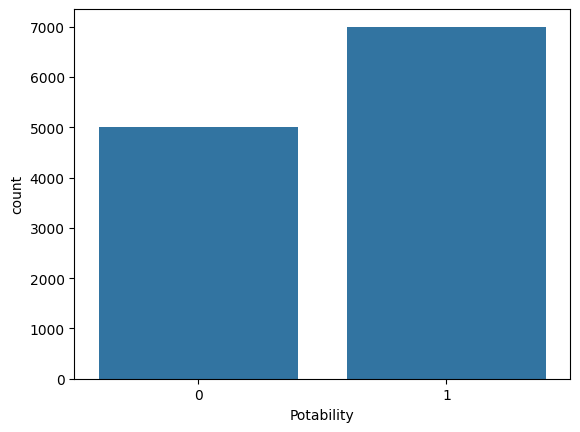

In [7]:
sns.countplot(x="Potability",data=df)

In [8]:
df["Potability"].value_counts()

Potability
1    7000
0    5000
Name: count, dtype: int64

<Axes: >

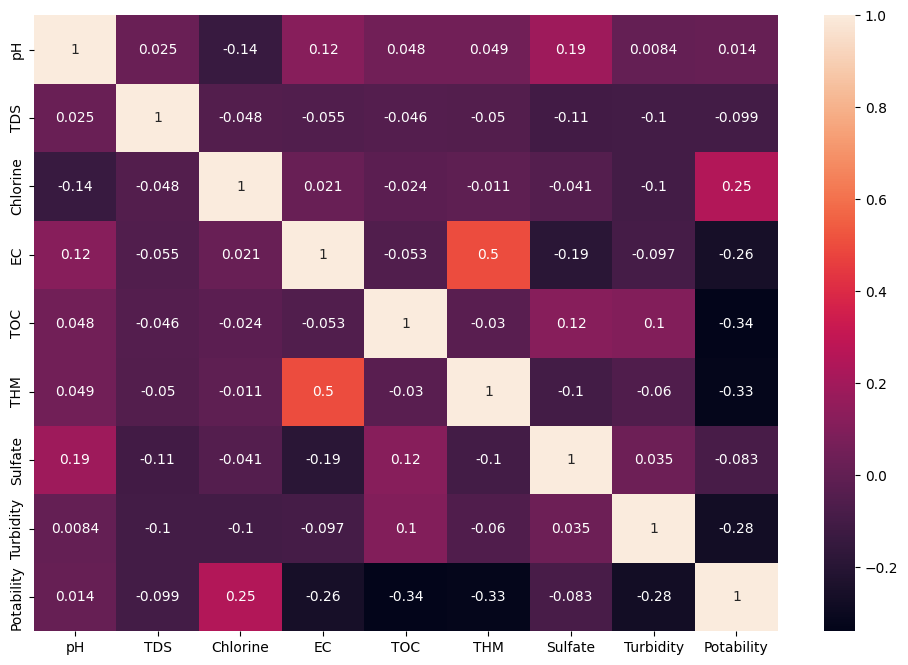

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

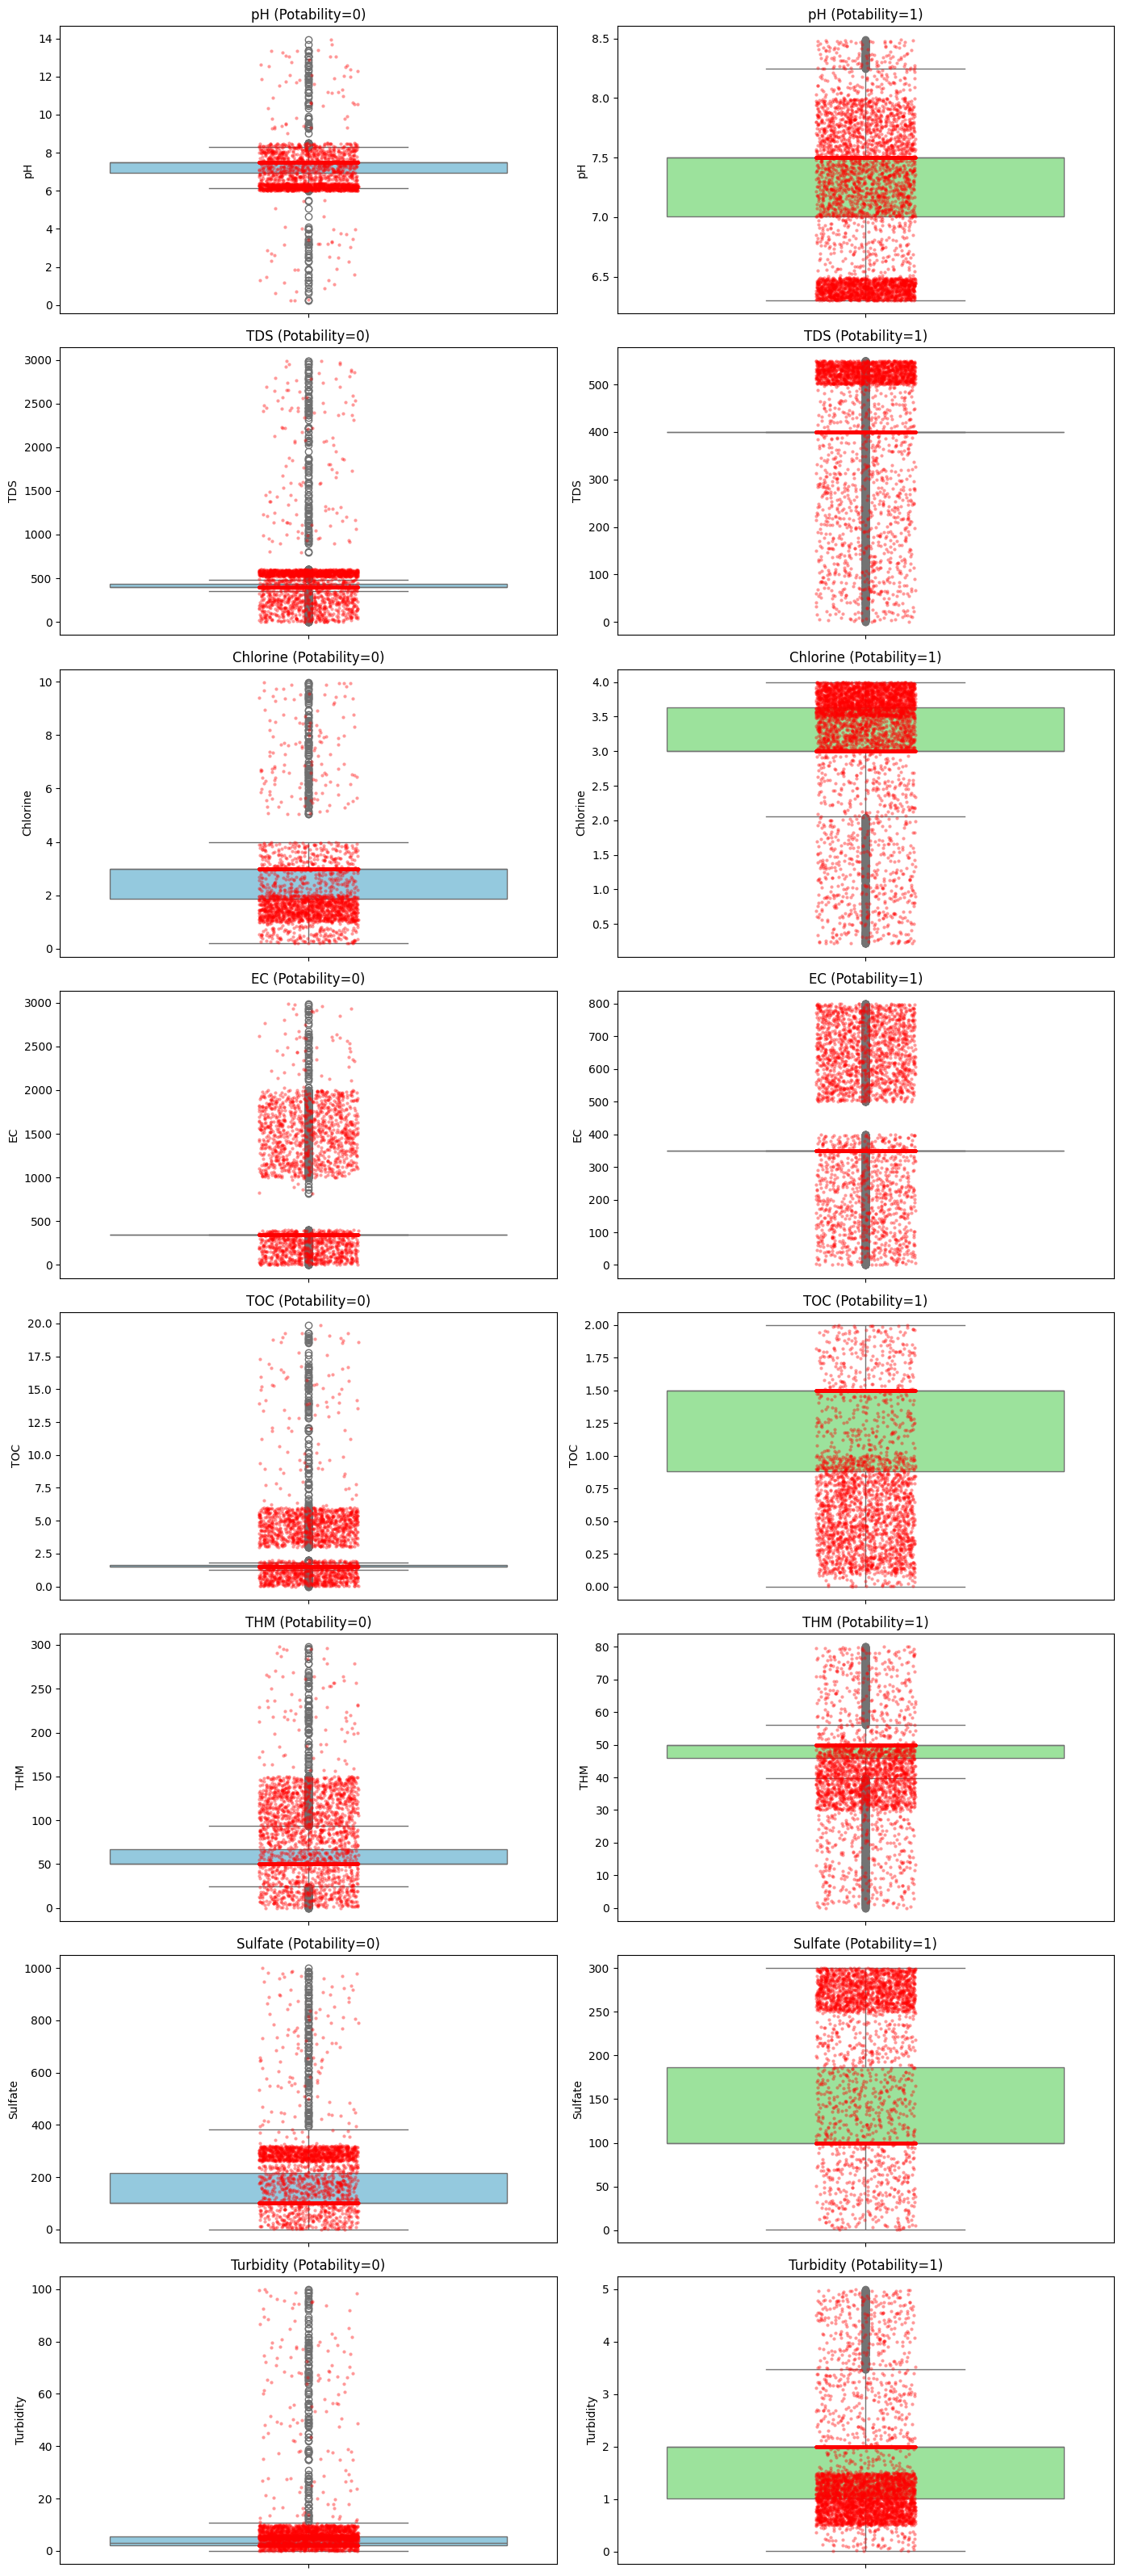

In [11]:
df_0 = df[df['Potability'] == 0].copy()
df_1 = df[df['Potability'] == 1].copy()
feature_cols = df.columns.drop('Potability')

fig, axes = plt.subplots(ncols=2, nrows=len(feature_cols), figsize=(14, 4 * len(feature_cols)))
axes = np.array(axes).reshape(len(feature_cols), 2)

for i, col in enumerate(feature_cols):
    # Potability = 0
    sns.boxplot(y=df_0[col], ax=axes[i][0], color='skyblue')
    sns.stripplot(y=df_0[col], ax=axes[i][0], color='red', size=3, jitter=True, alpha=0.4)
    axes[i][0].set_title(f'{col} (Potability=0)')

    # Potability = 1
    sns.boxplot(y=df_1[col], ax=axes[i][1], color='lightgreen')
    sns.stripplot(y=df_1[col], ax=axes[i][1], color='red', size=3, jitter=True, alpha=0.4)
    axes[i][1].set_title(f'{col} (Potability=1)')

plt.tight_layout()
plt.show()

In [13]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0
